In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Imputer

df_train = pd.read_csv('../data/macroCleanEngineeredTrain.csv')

In [46]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)

# We take all float/int columns except for ID, timestamp, and the target value
train_columns = list(
	set(df_train.select_dtypes(include=['float64', 'int64']).columns) - set(['id', 'timestamp', 'price_doc']))

samp_train = df_train.sample(frac = 0.2, replace=False)
x_train = samp_train[train_columns].values
names = list(samp_train[train_columns])
x_train = imp.fit_transform(x_train)
y_train = samp_train['price_doc'].values
y_train.reshape(y_train.size, 1)

forest = ExtraTreesClassifier(n_estimators = 10)
forest.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Feature ranking:
1. floor (0.049212)
2. full_sq (0.045099)
3. life_sq (0.032993)
4. build_year (0.025520)
5. max_floor (0.023486)
6. num_room (0.023150)
7. state (0.022381)
8. kitch_sq (0.022314)
9. material (0.017372)
10. cafe_avg_price_500 (0.016482)
11. cafe_sum_500_max_price_avg (0.015873)
12. cafe_sum_500_min_price_avg (0.015271)
13. hospital_beds_raion (0.013476)
14. cafe_sum_1000_min_price_avg (0.009283)
15. cafe_sum_1000_max_price_avg (0.009250)
16. cafe_avg_price_1000 (0.009093)
17. cafe_sum_1500_min_price_avg (0.007036)
18. cafe_avg_price_1500 (0.006970)
19. school_quota (0.006761)
20. preschool_quota (0.006253)
21. cafe_sum_1500_max_price_avg (0.006226)
22. green_zone_km (0.004953)
23. public_transport_station_km (0.004837)
24. build_count_1921-1945 (0.004782)
25. school_km (0.004719)
26. public_transport_station_min_walk (0.004685)
27. catering_km (0.004649)
28. build_count_1971-1995 (0.004585)
29. raion_build_count_with_material_info (0.004551)
30. preschool_km (0.004444)


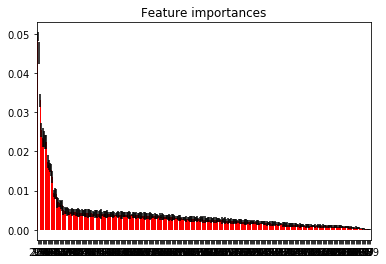

In [50]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()